In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      2389
           1       0.46      0.07      0.12       611

    accuracy                           0.79      3000
   macro avg       0.63      0.52      0.50      3000
weighted avg       0.73      0.79      0.73      3000



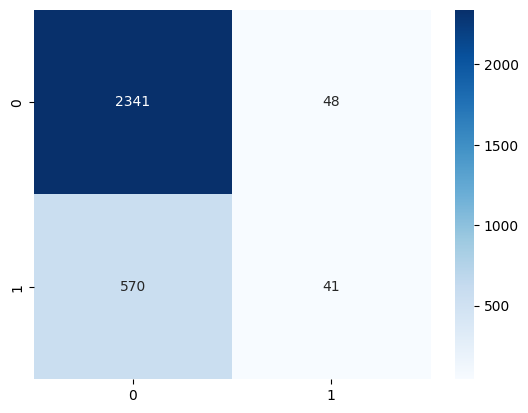

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv', encoding='latin1')

# Drop irrelevant columns (assuming these are not relevant for prediction)
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Assuming 'Exited' is still your target column
X = df_encoded.drop('Exited', axis=1)
Y = df_encoded['Exited']

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=44)

# Initialize and train the logistic regression model
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

# Make predictions on the test set
predLR = logmodel.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(Y_test, predLR))

# Calculate and display metrics using seaborn and matplotlib
cm = confusion_matrix(Y_test, predLR)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()
